In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import math

<h2>Clasificación no supervisada:</h2>
<p>La función <b>isodata</b> llevará a cabo la clasificación no supervisada de una imagen. Hay que tener en cuenta los siguientes aspectos:</p>
<p>• Debe realizar la clasificación mediante el algoritmo ISODATA.</p>
<p>• La función, además de la imagen original, recibirá como parámetro de entrada el número de clases (C) a utilizar en el proceso.</p>
<p>• Una vez finalizada la clasificación, se debe aplicar un procedimiento de seudo color antes de la visualización de los resultados con objeto de que cada clase se muestre con un color diferente.</p>

In [2]:
def isodata(img, C):
    v=np.zeros((C, img.shape[2]))
    #Calcular los centros aleatorios para las clases (C).
    #En una primera iteración fijaremos estos valores para depurar nuestra función con los valores que esperamos.
    v[0:]=(30.,60.,30.)   #terna RGB 
    v[1:]=(60.,70.,30.)
    v[2:]=(20.,40.,20.)
    v[3:]=(100.,150.,40.)
    
    #Crear resimg (imagen resultado):
    resimg=np.ones((img.shape[0], img.shape[1]), dtype=int)
    
    #Clasificar píxeles y recalcular centros:
    posCDistintos=True
    it=0
    cAnterior=0
    while posCDistintos:
        vc=v.copy()
        resimg, centros=clasifica(img,resimg,v)
        #Se recalculan los centros:
        for i in range(len(centros)):
            if len(centros[i])>0:            
                v[i]=recalculoCentro(centros[i])
        
        #Compruebo si los centros nuevos son distintos de los anteriores:
        iguales=True
        for i in range(v.shape[0]):
            for j in range(v.shape[1]):
                if (vc[i][j]-v[i][j])==0:
                    iguales=True
                else:
                    iguales=False
        if iguales:
            posCDistintos=False
        it=it+1
    
    return resimg

#Función que calcula la distancia euclidiana:
def dist_euclidiana(img,centros):
    dist=list()
    for c in centros:
        d=np.sqrt((np.power((img[0]-c[0]),2))+(np.power((img[1]-c[1]),2))+(np.power((img[2]-c[2]),2)))
        dist.append(d)
    return dist

#Función de clasificación:
def clasifica(img, resimg, centros):
    lista_centros=list()
    for x in range(centros.shape[0]):
        lista_centros.append(list())
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j][0]==0 and img[i,j][1]==0 and img[i,j][2]==0:
                resimg[i,j]=0
            else:
                dist=dist_euclidiana(img[i][j],centros)
                c=dist.index(min(dist)) #se elige el de menor distancia
                lista_centros[c].append((img[i,j][0],img[i,j][1],img[i,j][2]))
                resimg[i,j]=c+1
                
    return resimg, lista_centros

#Función para calcular el nuevo centro:
def recalculoCentro(centros):
    c1_valormedio=0
    c2_valormedio=0
    c3_valormedio=0
    for tc in centros:
        if len(tc)>0:
            c1_valormedio+=tc[0]
            c2_valormedio+=tc[1]
            c3_valormedio+=tc[2]
    nuevo_centro=(c1_valormedio/len(centros),c2_valormedio/len(centros),c3_valormedio/len(centros))
    return nuevo_centro

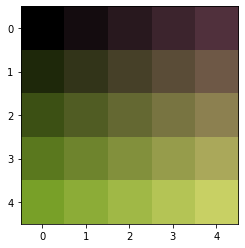

In [3]:
#Generar un degradado 5x5.
tam=5
b1=np.zeros([tam,tam,1],dtype=np.uint8)
b2=np.zeros([tam,tam,1],dtype=np.uint8)
b3=np.zeros([tam,tam,1],dtype=np.uint8)

i=0
while i<b1.shape[0]:
    j=0
    while j<b1.shape[1]:
        b1[i,j]=j*20+i*30
        b2[i,j]=j*12+i*40
        b3[i,j]=j*15+i*10
        j=j+1
    i=i+1

img=cv2.merge((b1,b2,b3))

plt.figure(1)
plt.imshow(img)

In [4]:
res=isodata(img, 4)
print(res)

[[0 3 3 1 2]
 [3 1 2 2 2]
 [1 2 2 4 4]
 [2 4 4 4 4]
 [4 4 4 4 4]]


In [5]:
#Colorea con seudocolor el resultado de la clasificación.
def seudo(img):
    resimg=np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    i=0
    while i<img.shape[0]:
        j=0
        while j<img.shape[1]:
            if img[i,j]==0:
                resimg[i,j,:]=[255,0,0]
            elif img[i,j]==1:
                resimg[i,j,:]=[0,255,0]
            elif img[i,j]==2:
                resimg[i,j,:]=[0,0,255]
            elif img[i,j]==3:
                resimg[i,j,:]=[255,255,0]
            elif img[i,j]==4:
                resimg[i,j,:]=[0,255,255]
            elif img[i,j]==5:
                resimg[i,j,:]=[255,0,255]
            else:
                resimg[i,j,:]=[0,0,0]
            j=j+1
        i=i+1
    return resimg

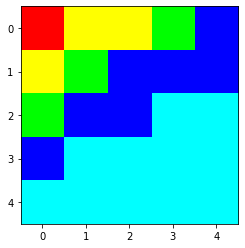

In [6]:
res_seudo=seudo(res)
plt.figure(2)
plt.imshow(res_seudo)

<h2>Selección aleatoria de centros:</h2>
<p>Tras verificar el paso anterior, ahora implementaremos la selección aleatoria de centros para calcular el vector v en función del número de clases que recibimos a la entrada. Tras realizar esta modificación, ajusta el generador de degradado para que nos genere ahora un degradado de mayor tamaño.</p>

In [7]:
def isodata2(img, C):
    #Cálculo aleatorio de valores del vector v:
    v=np.zeros((C, img.shape[2]))
    for i in range(v.shape[0]):
        v[i:]=(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    
    #Crear resimg (imagen resultado):
    resimg=np.ones((img.shape[0], img.shape[1]), dtype=int)
    
    #TODO: Clasificar píxeles.
    posCDistintos=True
    it=0
    cAnterior=0
    while posCDistintos:
        vc=v.copy()
        resimg, centros=clasifica(img,resimg,v)
        #Se recalculan los centros:
        for i in range(len(centros)):
            if len(centros[i])>0:            
                v[i]=recalculoCentro(centros[i])
        
        #Compruebo si los centros nuevos son distintos de los anteriores:
        iguales=True
        for i in range(v.shape[0]):
            for j in range(v.shape[1]):
                if (vc[i][j]-v[i][j])==0:
                    iguales=True
                else:
                    iguales=False
        if iguales:
            posCDistintos=False
        it=it+1
    
    return resimg

True

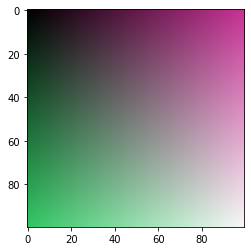

In [8]:
tam=100
b1=np.zeros([tam,tam,1],dtype=np.uint8)
b2=np.zeros([tam,tam,1],dtype=np.uint8)
b3=np.zeros([tam,tam,1],dtype=np.uint8)

i=0
while i<b1.shape[0]:
    j=0
    while j<b1.shape[1]:
        b1[i,j]=j*2+i*0.5
        b2[i,j]=j*0.5+i*2
        b3[i,j]=j*1.5+i*1
        j=j+1
    i=i+1
img_deg100=cv2.merge((b1,b2,b3))
plt.figure(3)
plt.imshow(img_deg100)
cv2.imwrite("clasificaciones/Ej2_degradado100.png",img_deg100)

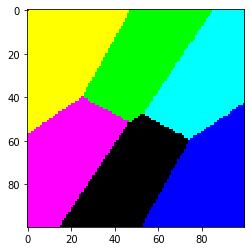

In [10]:
res=isodata2(img_deg100,6)
res_seudo=seudo(res)
plt.figure(4)
plt.imshow(res_seudo)

<p>Comprobaremos el funcionamiento de la función <b>isodata</b> aplicándola a las imágenes con la clase correspondiente.</p>

True

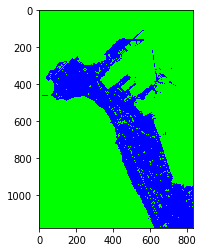

In [33]:
#Para IRS A con C=2
img_irsa=cv2.imread('../imgpack/IRS A/IRS_A_1-1_PAN.png')
res=isodata2(img_irsa,2)
res_seudo=seudo(res)
plt.figure(5)
plt.imshow(res_seudo)
cv2.imwrite("clasificaciones/Ej3_clasificacion_IRS_A.png",res_seudo)

True

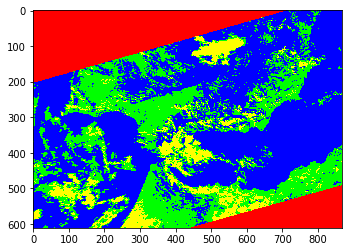

In [34]:
#Para NOAA con C=3
b1=cv2.imread('../imgpack/NOAA/NOAA_1-5_R.png',cv2.IMREAD_GRAYSCALE)
b2=cv2.imread('../imgpack/NOAA/NOAA_2-5_NIR.png',cv2.IMREAD_GRAYSCALE)
b3=cv2.imread('../imgpack/NOAA/NOAA_3-5_SWIR.png',cv2.IMREAD_GRAYSCALE)

img_noaa=cv2.merge((b1,b2,b3))

res=isodata2(img_noaa,3)
res_seudo=seudo(res)
plt.figure(6)
plt.imshow(res_seudo)
cv2.imwrite("clasificaciones/Ej3_clasificacion_NOAA.png",res_seudo)

<h2>Clasificación en la imagen de la borrasca Filomena:</h2>
<p>El paso de la borrasca Filomena ha dejado tras de sí una imagen peculiar de la península ibérica. A continuación, aplicaremos lo anterior para clasificar las zonas de la imagen seleccionada. Si el tiempo es muy grande, se puede realizar un diezmado previo.</p>

In [31]:
def diezmado(img,r):
    listaND=list()
    i=0
    while i<img.shape[0]:
        j=0
        while j<img.shape[1]:
            listaND.append(img[i,j])
            j=j+int(1/r)
        i=i+int(1/r)    
    resimg=np.reshape(listaND,[int(np.ceil(img.shape[0]/(np.round(1/r)))),int(np.ceil(img.shape[1]/(np.round(1/r))))])
    return resimg

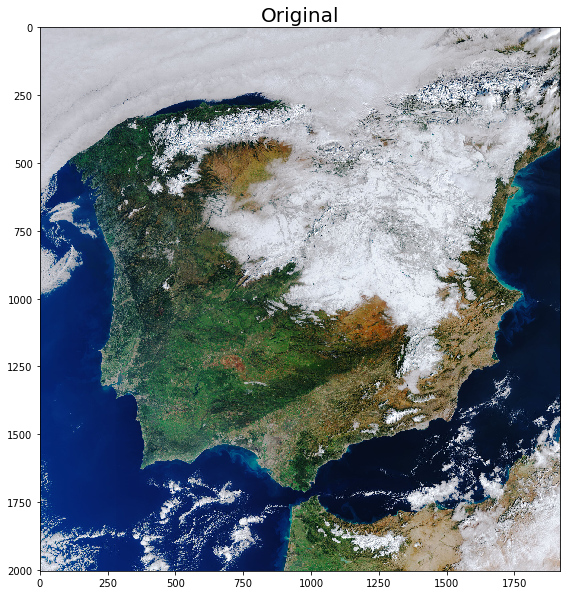

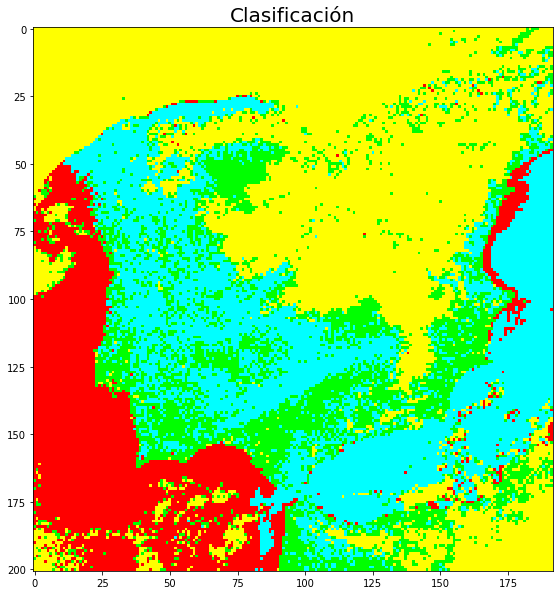

In [36]:
filomena=cv2.imread('../imgpack/Filomena.jpg')
b1,b2,b3=cv2.split(filomena)
b1_diezmado=diezmado(b1,0.1)
b2_diezmado=diezmado(b2,0.1)
b3_diezmado=diezmado(b3,0.1)
filomena_diezmado=cv2.merge((b1_diezmado,b2_diezmado,b3_diezmado))
filomena_isodata=isodata(filomena_diezmado,4)
filomena_seudo=seudo(filomena_isodata)

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(filomena, cv2.COLOR_BGR2RGB))
plt.title("Original", fontsize=20)
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(filomena_seudo, cv2.COLOR_BGR2RGB))
plt.title("Clasificación", fontsize=20)
plt.show()

In [37]:
cv2.imwrite("clasificaciones/Ej4_Filomena_Clasificacion.png",filomena_seudo)

True